# Understanding the Drivers of Drug Adherence

In [15]:
import pandas as pd
import numpy as np
# Reading the dataset
filepath='C:\\Users\\user\\Downloads\\Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent (1).xlsx'
data=pd.read_excel(filepath, sheet_name=1 )

In [16]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [17]:
# Checking for null values
data.isnull().values.any()

False

In [22]:
# Seperating and exploring the target variable
target=pd.DataFrame(data['Persistency_Flag'])
target['Persistency_Flag'].value_counts(1)
# 60-40 distribution of non persistent vs persistent

Non-Persistent    0.62354
Persistent        0.37646
Name: Persistency_Flag, dtype: float64

In [25]:
# Creating subset of train columns and id column, both are not needed in training
train_data=data.drop(['Persistency_Flag','Ptid'],axis=1)

In [27]:
#To identify the numeric columns
data.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [40]:
# Encoding all the categorical columns
encoded_cols=[x for x in train_data.columns if x not in ['Dexa_Freq_During_Rx','Count_Of_Risks']]
q1=train_data.copy()
encoded_col_names=[]
for i in encoded_cols:
    """
    If the column has fewer than 5 categories then label enode the categories example- male-0, female-1 
    """
    if (q1[i].nunique()<=5):
        q1[i]=q1[i].astype('category')
        q1[i+'_enco']=q1[i].cat.codes
    else:
        """
        If the column has more than 5 categories then top 10 categories are labele encoded, rest all all tagged as 'others'
        """
        n = 10
    #             q1[i+_enco]=q1[i+_enco].astype('category')
        t=q1[i].value_counts()[:n].index.tolist()
        q1[i+'_enco']=np.where(~q1[i].isin(t),'others',q1[i])
        q1[i+'_enco']=q1[i+'_enco'].astype('category')
    #             print(i,q1[i+'_enco'].unique())
        q1[i+'_enco']=q1[i+'_enco'].cat.codes

    encoded_col_names.append(i+'_enco')

#copying the newly coded vriables into the train dataset
train_data=q1.copy() 

#encoding the target variable
target['Persistency_Flag_enco']=np.where(target['Persistency_Flag']=='Persistent',1,0)



In [58]:
# Combining encoded columns and numeric columns to get list of train columns
train_cols= encoded_col_names+ ['Dexa_Freq_During_Rx','Count_Of_Risks']

In [59]:
train_data[train_cols].head()

,Gender_enco,Race_enco,Ethnicity_enco,Region_enco,Age_Bucket_enco,Ntm_Speciality_enco,Ntm_Specialist_Flag_enco,Ntm_Speciality_Bucket_enco,Gluco_Record_Prior_Ntm_enco,Gluco_Record_During_Rx_enco,...,Risk_Low_Calcium_Intake_enco,Risk_Vitamin_D_Insufficiency_enco,Risk_Poor_Health_Frailty_enco,Risk_Excessive_Thinness_enco,Risk_Hysterectomy_Oophorectomy_enco,Risk_Estrogen_Deficiency_enco,Risk_Immobilization_enco,Risk_Recurring_Falls_enco,Dexa_Freq_During_Rx,Count_Of_Risks
0,1,2,1,4,3,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,4,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,1,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,2
3,0,2,1,0,3,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,2,1,0,3,2,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
#saving the final processed data into file
final_processed_dataset= pd.concat([train_data, target],axis=1)
final_processed_dataset.to_csv('Final_analytical_processed_data.csv')

In [50]:
#Converting all the encoded columns as categorical for modleing
for i in encoded_col_names:
    train_data[i]=train_data[i].astype('category')
    if(train_data[i].dtype!='category'):
        print('type incorrect')

In [51]:
#1 stands for persitent in encoded target columns
target.head()

,Persistency_Flag,Persistency_Flag_enco
0,Persistent,1
1,Non-Persistent,0
2,Non-Persistent,0
3,Non-Persistent,0
4,Non-Persistent,0


In [78]:
"""
Performing train test split 70% training and 30% testing examples, random split
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
    train_data[train_cols], target['Persistency_Flag_enco'], test_size = 0.3, random_state = 100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_test.value_counts())

(2396, 67) (1028, 67) (2396,) (1028,)
0    624
1    404
Name: Persistency_Flag_enco, dtype: int64


# Decision Tree model

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc

clf = DecisionTreeClassifier( max_depth=4,min_samples_split=20, min_samples_leaf=20,)
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print('\nTrain Accuracy Score is',clf.score(X_train,y_train))
print('\nTest Accuracy Score is',clf.score(X_test,y_test))

#predicting on test data
y_pred=clf.predict(X_test)

#auc of decision trees
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print('AUC score is ',auc(fpr,tpr))

print('\nConfusion matrix for decision tree is\n',confusion_matrix(y_test, y_pred))

print('Classification report of decsion tree on test is \n', classification_report(y_test, y_pred))


Train Accuracy Score is 0.8109348914858097

Test Accuracy Score is 0.7752918287937743
AUC score is  0.7437801472454937

Confusion matrix for decision tree is
 [[556  68]
 [163 241]]
Classification report of decsion tree on test is 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       624
           1       0.78      0.60      0.68       404

    accuracy                           0.78      1028
   macro avg       0.78      0.74      0.75      1028
weighted avg       0.78      0.78      0.77      1028



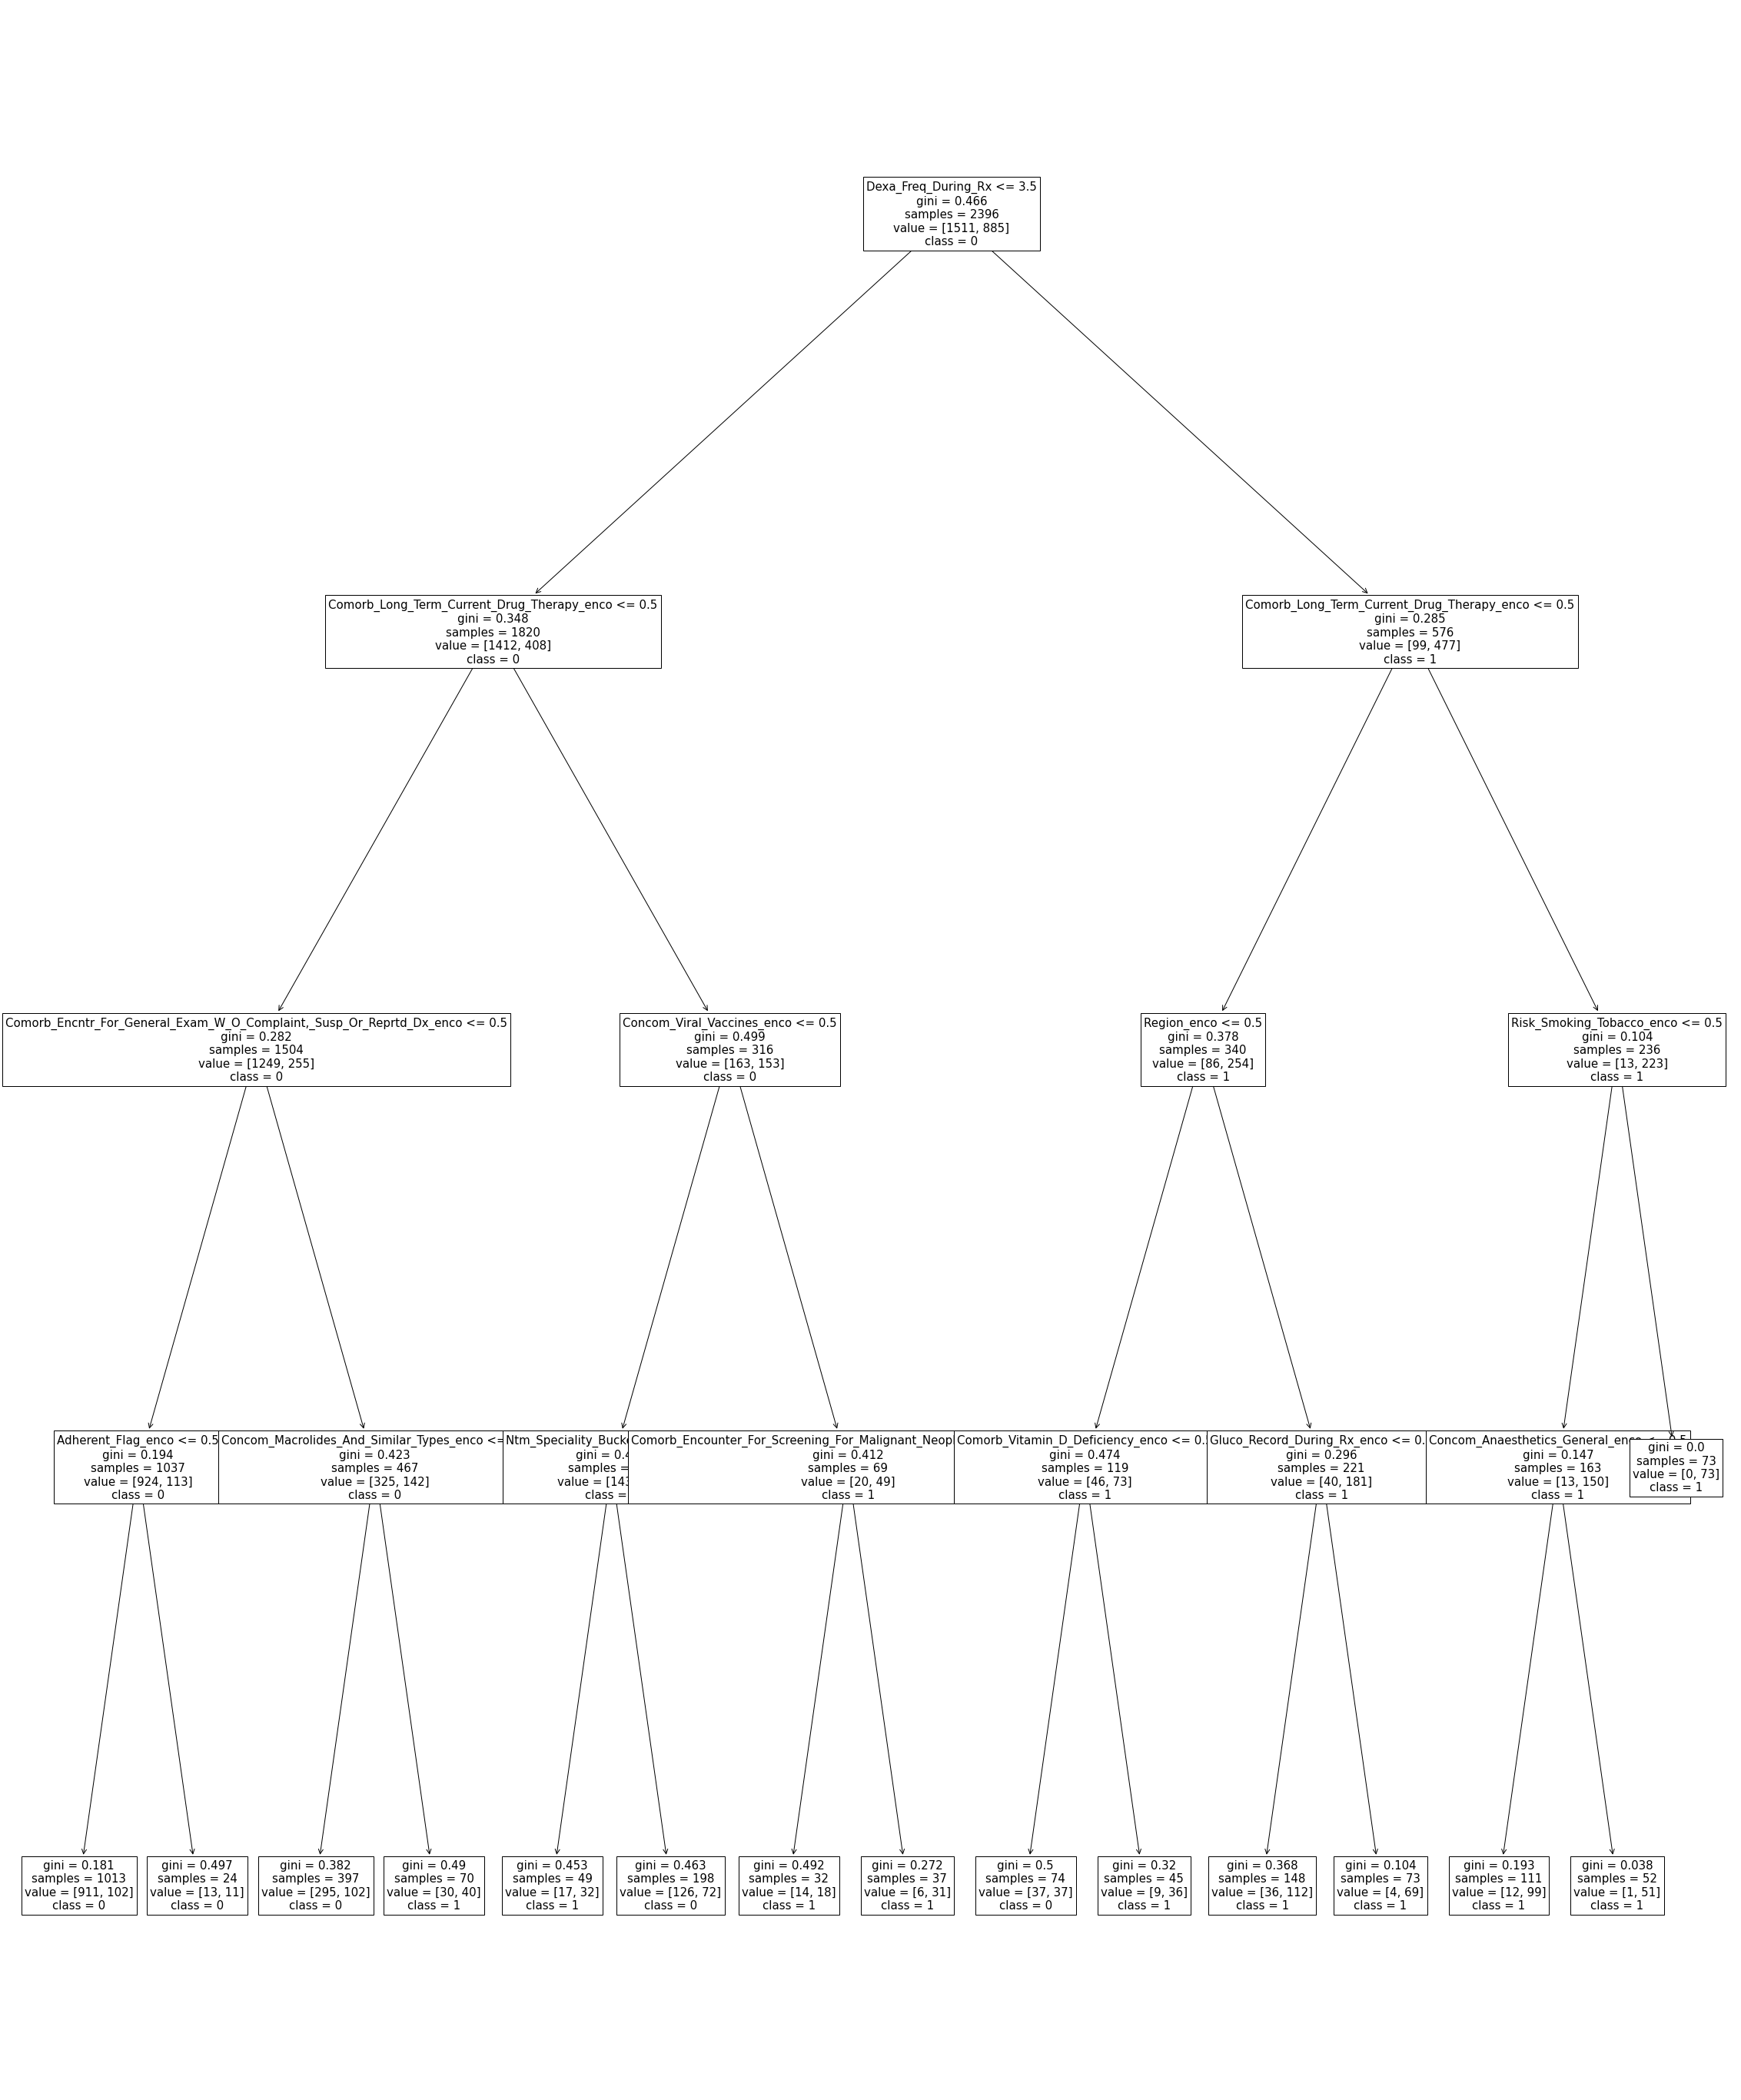

In [90]:
# PLotting decision tree
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

fig = plt.figure(figsize=(40,50))
_ = tree.plot_tree(clf,fontsize=15,feature_names=train_cols,  
                   class_names=["0","1"])

In [92]:
# Feature importances in decision tree
clf.feature_importances_.argsort()
imp= (pd.DataFrame([train_cols,clf.feature_importances_])).T
imp.columns=['feature','importance']
imp= imp.sort_values(by='importance',ascending=False)
imp.head(15)

,feature,importance
65,Dexa_Freq_During_Rx,0.69612
28,Comorb_Long_Term_Current_Drug_Therapy_enco,0.136543
24,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_...",0.053461
42,Concom_Macrolides_And_Similar_Types_enco,0.025674
45,Concom_Viral_Vaccines_enco,0.019661
7,Ntm_Speciality_Bucket_enco,0.014352
3,Region_enco,0.014256
19,Adherent_Flag_enco,0.01308
25,Comorb_Vitamin_D_Deficiency_enco,0.010985
9,Gluco_Record_During_Rx_enco,0.007573


# Appendix 

In [132]:
"""
Logistic Regression
"""
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X_train, y_train)
clf1.score(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

print('\nTrain Accuracy Score is',clf1.score(X_train,y_train))
print('\nTest Accuracy Score is',clf1.score(X_test,y_test))

#predicting on test data
y_pred1=clf1.predict(X_test)

#auc of decision trees
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)
print('AUC score is ',auc(fpr,tpr))

print('\nConfusion matrix for  logistic regression is\n',confusion_matrix(y_test, y_pred1))

print('Classification report of logistic regression on test is \n', classification_report(y_test, y_pred1))

C:\Users\user\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Train Accuracy Score is 0.827212020033389

Test Accuracy Score is 0.8025291828793775
AUC score is  0.7801789794364051

Confusion matrix for  logistic regression is
 [[552  72]
 [131 273]]
Classification report of logistic regression on test is 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       624
           1       0.79      0.68      0.73       404

    accuracy                           0.80      1028
   macro avg       0.80      0.78      0.79      1028
weighted avg       0.80      0.80      0.80      1028



In [133]:
# Logistic coefficients
imp= (pd.DataFrame([train_cols,abs(clf1.coef_[0])])).T
imp.columns=['feature','coffecients']

imp= imp.sort_values(by='coffecients',ascending=False)
imp.head(15)

,feature,coffecients
10,Dexa_During_Rx_enco,1.858578
50,Risk_Untreated_Chronic_Hypogonadism_enco,1.191395
28,Comorb_Long_Term_Current_Drug_Therapy_enco,0.94485
59,Risk_Poor_Health_Frailty_enco,0.846733
31,Comorb_Other_Disorders_Of_Bone_Density_And_Str...,0.817341
25,Comorb_Vitamin_D_Deficiency_enco,0.800038
45,Concom_Viral_Vaccines_enco,0.783402
24,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_...",0.692191
61,Risk_Hysterectomy_Oophorectomy_enco,0.660973
48,Risk_Rheumatoid_Arthritis_enco,0.638044


In [134]:
"""
Random Forest Classifier
"""
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf2=RandomForestClassifier(min_samples_leaf=10,max_depth=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)


#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)

print('\nTrain Accuracy Score is',clf2.score(X_train,y_train))
print('\nTest Accuracy Score is',clf2.score(X_test,y_test))

#predicting on test data
y_pred2=clf2.predict(X_test)

#auc of decision trees
fpr,tpr,thresholds=roc_curve(y_test,y_pred2)
print('AUC score is ',auc(fpr,tpr))

print('\nConfusion matrix for  random forest is\n',confusion_matrix(y_test, y_pred2))

print('Classification report of random forest on test is \n', classification_report(y_test, y_pred2))


Train Accuracy Score is 0.820534223706177

Test Accuracy Score is 0.7821011673151751
AUC score is  0.7485164381822796

Confusion matrix for  random forest is
 [[565  59]
 [165 239]]
Classification report of random forest on test is 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       624
           1       0.80      0.59      0.68       404

    accuracy                           0.78      1028
   macro avg       0.79      0.75      0.76      1028
weighted avg       0.78      0.78      0.77      1028



In [135]:
# Random Forest feature importances
clf2.feature_importances_.argsort()
imp= (pd.DataFrame([train_cols,clf2.feature_importances_])).T
imp.columns=['feature','importance']
imp= imp.sort_values(by='importance',ascending=False)
imp

,feature,importance
65,Dexa_Freq_During_Rx,0.214497
10,Dexa_During_Rx_enco,0.205974
28,Comorb_Long_Term_Current_Drug_Therapy_enco,0.094762
22,Comorb_Encounter_For_Screening_For_Malignant_N...,0.065175
23,Comorb_Encounter_For_Immunization_enco,0.060897
...,...,...
60,Risk_Excessive_Thinness_enco,0.0
61,Risk_Hysterectomy_Oophorectomy_enco,0.0
62,Risk_Estrogen_Deficiency_enco,0.0
63,Risk_Immobilization_enco,0.0
